<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/new_practice/predict_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
uploaded = files.upload()

Saving tem10y.csv to tem10y (1).csv


In [14]:
from sklearn.linear_model import LinearRegression #선형회귀
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
#기온 데이터 읽어 들이기
df =pd.read_csv('tem10y.csv', encoding="utf-8")

In [16]:
df

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


In [17]:
#데이터를 학습 전용과 테스트 전용으로 분리하기 (*1)

train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)
interval = 6

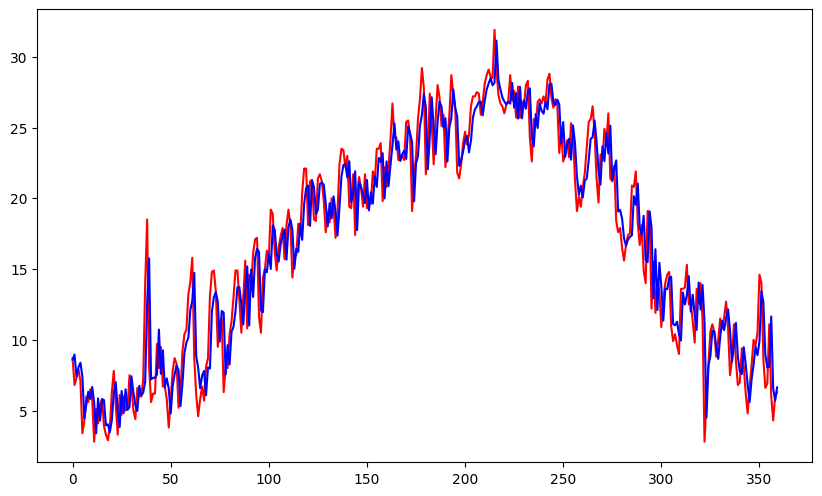

In [21]:
#과거 6일의 데이터를 기반으로 학슬할 데이터 만들기 ( *2 ) 

#학습전용 데이터를 만드는 make-data(), 과거 6일 동안의 데이터를 기반으로 다음 날의 데이터를 예측하는 것이 목적이므로 설명 변수 x에 과거 6일 동안의 데이터를 넣고 목적 변수 y에 다음날의 데이터를 넣어 리스트로 만든다.
def make_data(data):
  x = [] #학습 데이터
  y= [] #결과
  temps = list(data["기온"])
  for i in range(len(temps)):
    if i < interval : continue
    y.append(temps[i])
    xa=[]
    for p in range(interval):
      d = i + p - interval
      xa.append(temps[d])
    x.append(xa)
  return (x,y)
  
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

#직선 회귀 분석하기 ( *3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) #학습하기
pre_y = lr.predict(test_x) #예측하기

#결과를 그래프로 그리기 ( *4)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('weather-tem-lr.png')
plt.show()

In [22]:
pre_y-test_y

array([-0.10002007,  2.15225572,  0.10256015,  0.15142234,  1.28187488,
        4.01365434,  0.13671099, -0.56975101,  0.72603441, -0.68140458,
        0.87244611,  2.7607466 , -1.70903185,  1.75737089, -1.11231561,
        0.01187698,  1.83773828,  0.65039859,  1.12591734, -0.32619115,
       -1.97861532, -1.57885621,  1.59928286,  1.72686513, -2.27163088,
        1.68023609, -1.18539052,  1.50001243, -0.05121848, -2.25973761,
        0.72214703,  1.27944462,  0.98314343, -1.63017942,  0.74598537,
        0.06470342, -0.92896962, -6.94975005, -5.93966138,  7.65213866,
        1.595504  ,  1.11502761,  1.11392207, -2.14812766,  2.7258388 ,
       -1.9074255 ,  2.55773688, -0.06004565,  1.47215308,  2.75437918,
       -1.01277685, -1.07156242, -1.15714278, -0.1103171 ,  2.66758147,
       -0.98676704, -2.27801803, -1.34517563, -0.89701271, -3.05874001,
       -2.0044005 , -3.03635208,  6.03314611,  2.75256234,  3.40484054,
        0.78378786,  0.7571854 ,  2.09606982, -2.02017163, -0.65

In [23]:
#오차 확인하기

diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y)/ len(diff_y))
print("max=", max(diff_y))

average= 1.6640684971954243
max= 8.471949619908475


In [ ]:
#평균 1.69도의 오차, 최대 8.6도의 오차